# Linear Regression Project

# Laptop Price Predictions

## Introduction

Laptops have become essential in our technology-driven world, but determining the right price can be challenging amidst the variety of brands and models available. To tackle this, we employ machine learning, specifically linear regression, to provide valuable insights. By exploring a dataset containing laptop information, we aim to build a predictive model that estimates laptop prices based on their features. The dataset comprises 19 columns, including features like brand, processor type, RAM, storage capacity, and other specifications, along with their corresponding prices. 

The process begins by understanding the dataset, exploring its columns, and gaining insights into the relationships between different features and laptop prices. We will preprocess the data, converting categorical variables into numerical representations, and scaling the data if necessary. Subsequently, we will split the dataset into training and testing sets to evaluate the performance of our model accurately.

These insights benefit consumers in purchasing decisions and aid manufacturers and retailers in competitive pricing.

The dataset was taken from [Kaggle]("https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset?select=laptopPrice.csv").

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the dataset

In [2]:
laptops = pd.read_csv("laptopPrice.csv")

## Initial Data Exploration

In [3]:
laptops.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [4]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [5]:
laptops.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


- Dataset has 823 rows and 19 columns.
- All values are non-null. 
- Data type of most of the columns is object.
- Price, number of ratings and number of reviews are in integers. 
- It looks like there are outliers in all 3 numerical columns.

## Exploratory Data Analysis

#### Let's first explore relationships and correlations across all numerical columns.

<Figure size 640x480 with 0 Axes>

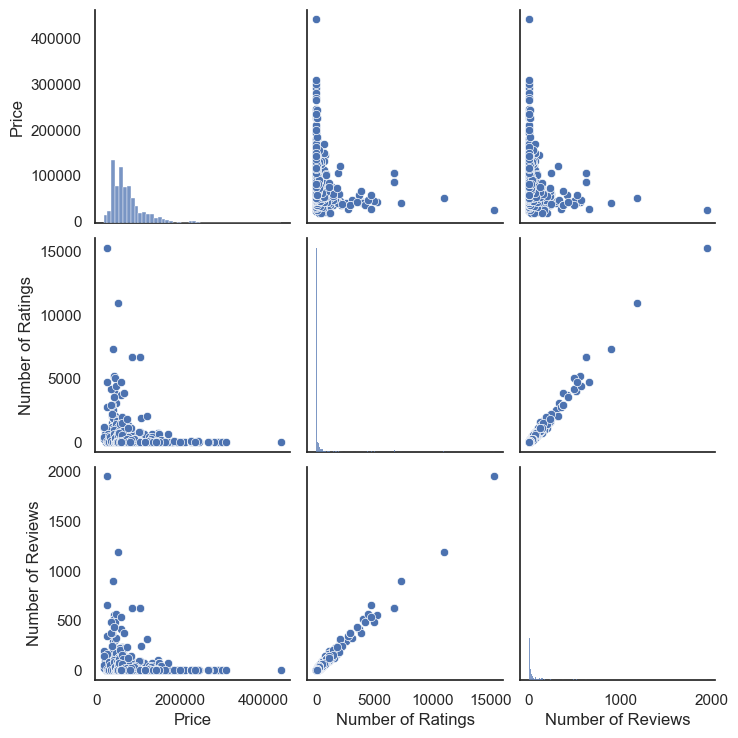

In [6]:
sns.set_theme(style="white")
sns.despine()

sns.pairplot(laptops);

- Price doesn't seem to have any linear correlation with any of these columns.
- But there is a positive correlation between number of ratings and number of reviews.
- Outliers make hard and even impossible to see distribution of the columns.

#### Regression line for correlated columns.

Visually, the highest correlation is between Number of Ratings and Number of Reviews. Let's explore it in more detail.

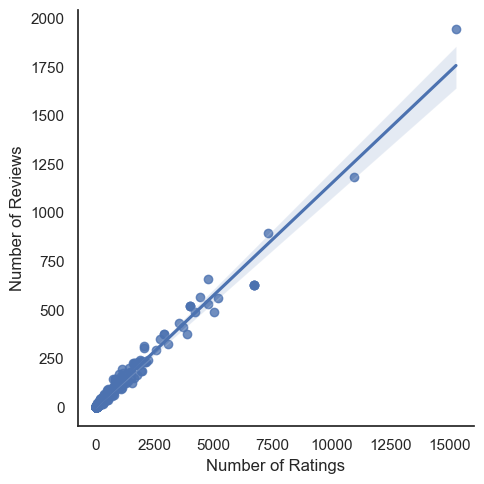

In [7]:
sns.lmplot(x='Number of Ratings',y='Number of Reviews',data=laptops);

Right, these columns seem to be highly correlated.

### Univariate and Bivariate Analysis 

#### Brands

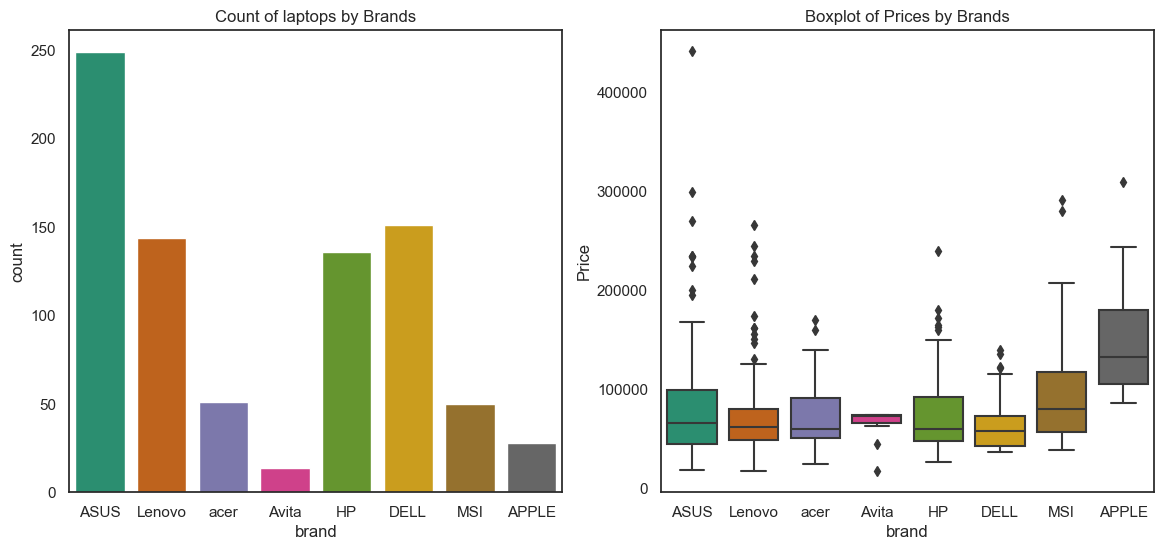

In [8]:
sns.set_palette("Dark2")
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.brand)
axes[0].set_title("Count of laptops by Brands")

sns.boxplot(ax=axes[1], x=laptops.brand, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Brands");

#### Processor Brands

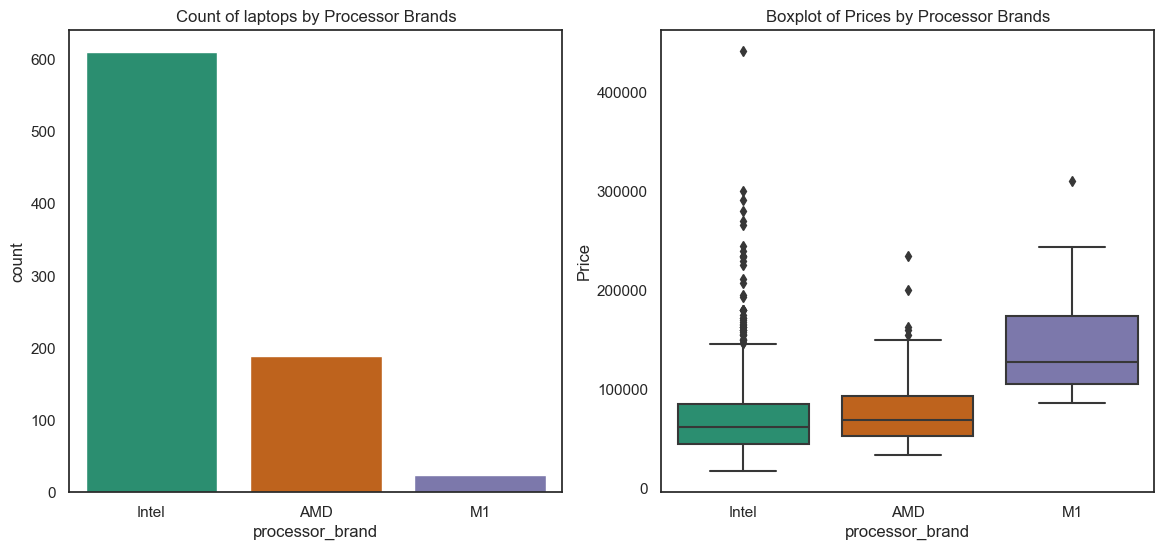

In [9]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_brand)
axes[0].set_title("Count of laptops by Processor Brands")

sns.boxplot(ax=axes[1], x=laptops.processor_brand, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Processor Brands");

#### Processor Names

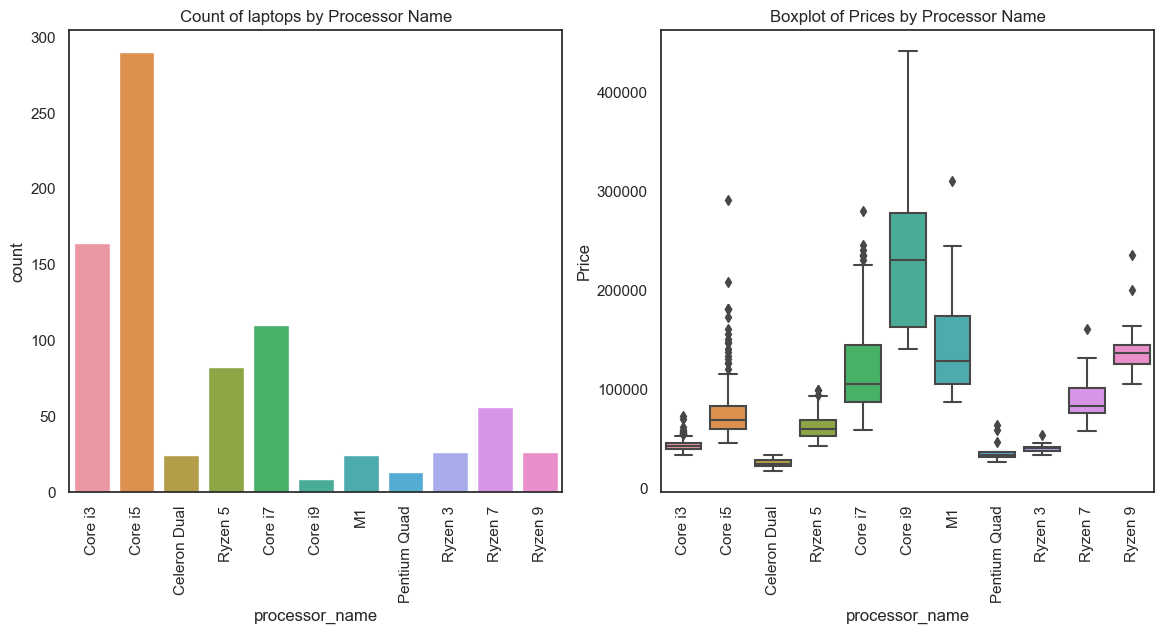

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_name)
axes[0].set_title("Count of laptops by Processor Name")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axes[1], x=laptops.processor_name, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Processor Name")
axes[1].tick_params(axis='x', rotation=90);

#### Ram GB

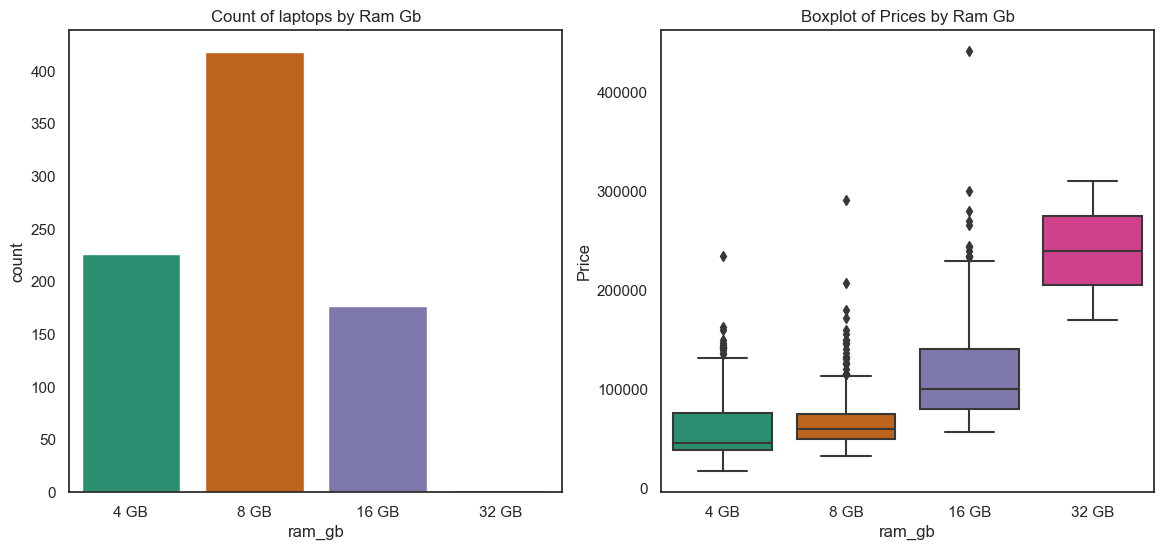

In [11]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.ram_gb)
axes[0].set_title("Count of laptops by Ram Gb")

sns.boxplot(ax=axes[1], x=laptops.ram_gb, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Ram Gb");

#### Solid State Drive (SSD)

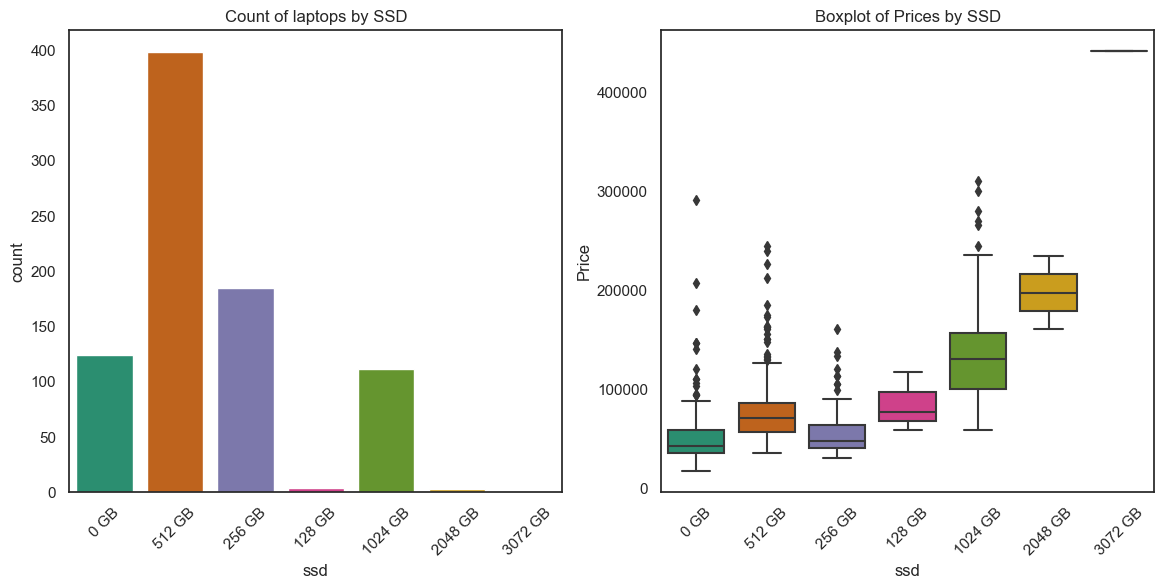

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.ssd)
axes[0].set_title("Count of laptops by SSD")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1], x=laptops.ssd, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by SSD")
axes[1].tick_params(axis='x', rotation=45);

#### Operating Systems

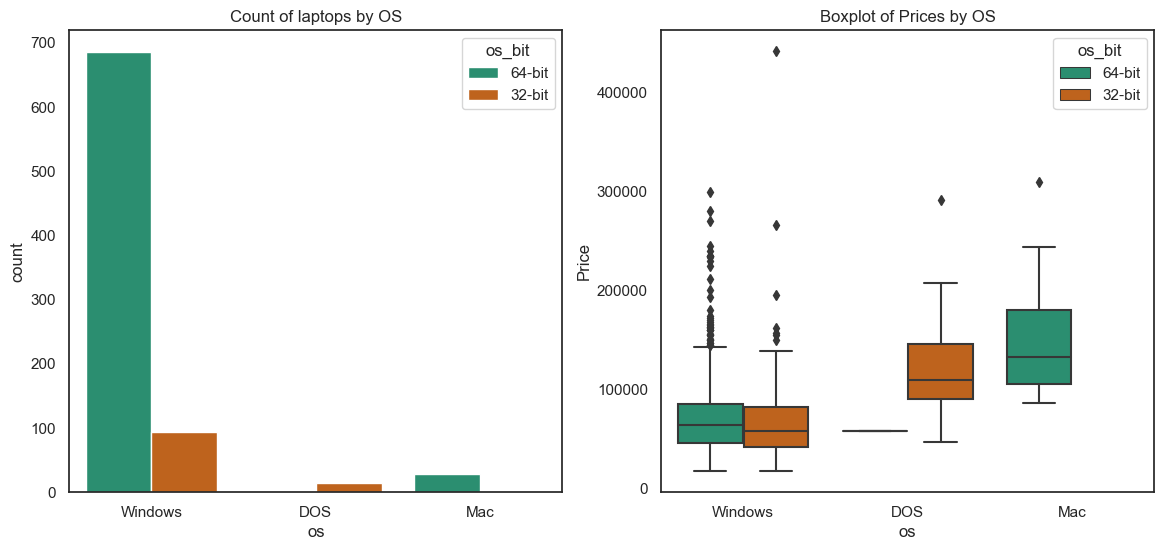

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.os, hue=laptops.os_bit)
axes[0].set_title("Count of laptops by OS")

sns.boxplot(ax=axes[1], x=laptops.os, y=laptops.Price, hue=laptops.os_bit)
axes[1].set_title("Boxplot of Prices by OS");

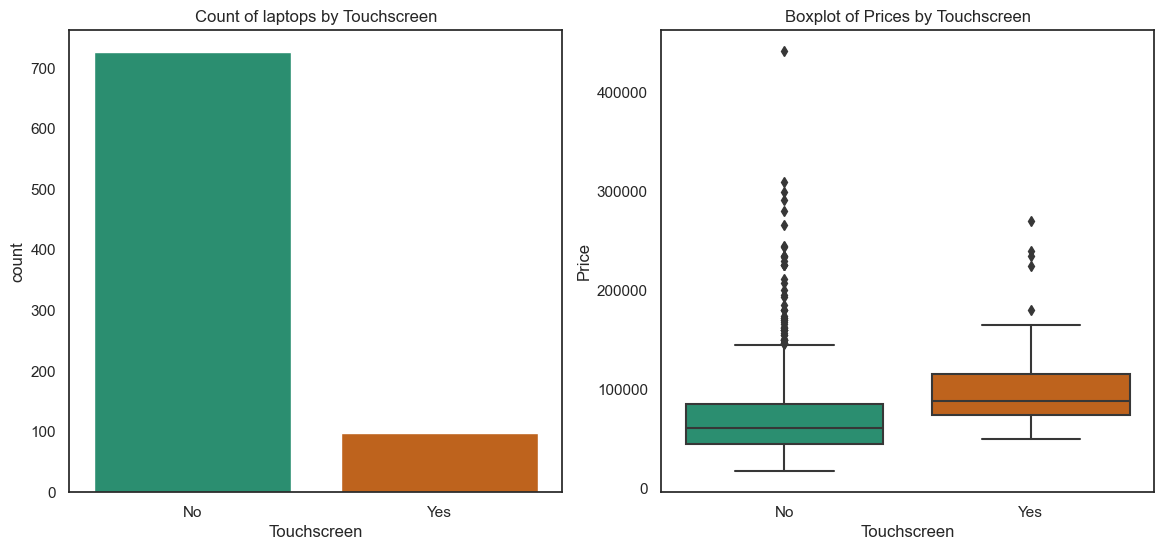

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.Touchscreen)
axes[0].set_title("Count of laptops by Touchscreen")

sns.boxplot(ax=axes[1], x=laptops.Touchscreen, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Touchscreen");

According to the plots above:
- ASUS is represented the most in our dataset, while APPLE seems to be the most expensive.
- Most of the laptops have processor Intel, while M1 is the most expensive on average.
- Core i9 is the latest and the fastest Intel processor and it is the most expensive, but most laptops represented in our dataset have Core i5 and Core i3.
- 8 GB is the standard amount of RAM for an average laptop and we see it's the most popular one. Another observation is that more gigabytes of RAM correlate with higher prices. 32 GB Ram is the most expensive and the least used for now.
- As well, capacity of SSD is correlated with prices. And most laptops have 512 GB, which is enough for business use and simple gaming.
- Windows is definetely the most popular operating system and on average it's the most affordable too.
- 7 out 8 laptops don't have touchscreen.

### Data Cleaning

####  Replace "Not Available" values in the processor generation column with the most common value.

In [15]:
laptops['processor_gnrtn'].replace('Not Available', laptops['processor_gnrtn'].mode()[0], inplace=True)

#### Remove outliers

Now, it's time to remove outliers in the numerical columns of the dataset.

`IQR (Inter Quartile Range)` approach to finding the outliers is the most commonly used and most trusted approach used in the research field. IQR focuses on the middle 50% of the data, which is the range between the 25th and 75th percentiles. To define outliers using the interquartile range (IQR), we can utilize a simple rule called the "1.5 times the IQR rule." According to this rule, any data point that falls below the lower quartile minus 1.5 times the IQR or above the upper quartile plus 1.5 times the IQR is considered an outlier.

Mathematically, the upper and lower outlier thresholds are calculated as:

upper = Q3 + (1.5 * IQR)

lower = Q1 – (1.5 * IQR)

In [16]:
# function to identify and remove outliers from the specified column of the dataframe

def remove_outlier_IQR(df, column):
    
    # sort values in ascending order in order to calculate the quartiles and the IQR 
    sorts = df[column].sort_values()
    
    Q1 = sorts.quantile(0.25)    #  25th percentile (first quartile)
    Q3 = sorts.quantile(0.75)    #  75th percentile (third quartile)
    IQR = Q3 - Q1
    
    lower_bound = sorts < (Q1-1.5*IQR)
    upper_bound = sorts > (Q3+1.5*IQR)
    # exlude rows from the dataframe above and below bounds
    df_final = df[~((lower_bound) | (upper_bound))].reset_index(drop=True)    
    
    return df_final

In [17]:
# apply the function to all 3 numerical columns
laptops1 = remove_outlier_IQR(laptops, "Price")
laptops2 = remove_outlier_IQR(laptops1, "Number of Reviews")
laptops_clean = remove_outlier_IQR(laptops2, "Number of Ratings")

C:\Users\annab\AppData\Local\Temp\ipykernel_17588\272999119.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final = df[~((lower_bound) | (upper_bound))].reset_index(drop=True)
C:\Users\annab\AppData\Local\Temp\ipykernel_17588\272999119.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final = df[~((lower_bound) | (upper_bound))].reset_index(drop=True)
C:\Users\annab\AppData\Local\Temp\ipykernel_17588\272999119.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final = df[~((lower_bound) | (upper_bound))].reset_index(drop=True)


In [18]:
laptops_clean.shape

(552, 19)

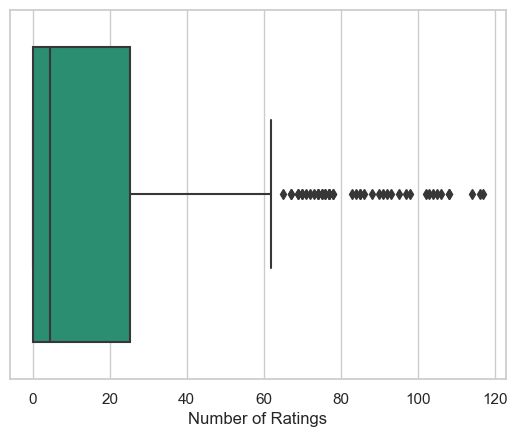

In [19]:
sns.set_style("whitegrid")

sns.boxplot(x=laptops_clean["Number of Ratings"]);

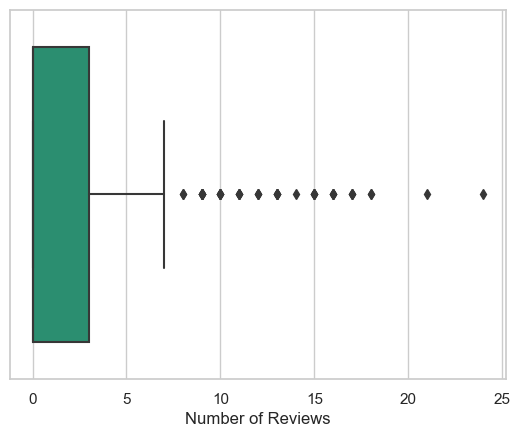

In [20]:
sns.boxplot(x=laptops_clean["Number of Reviews"]);

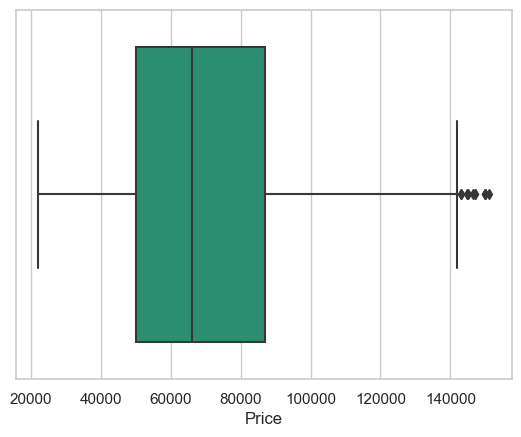

In [21]:
sns.boxplot(x=laptops_clean["Price"]);

Now we can see:
- All numerical columns have right skewed distribution.
- Most of the laptops have between 0 and 25 number of ratings and 0 and 3 number of reviews.
- And price for most of the laptops is somewhere between 50,000 and 85,000 (rupees, which is around 600-1000 usd).

#### Clean Rating column

In [23]:
laptops_clean['rating'] = laptops_clean['rating'].str.split().str[0].astype('int')

#### Turn categorical variables into dummies

In [24]:
columns_to_encode = ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 
                     'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice']
laptops_final = pd.get_dummies(laptops_clean, columns=columns_to_encode, drop_first=True)

In [25]:
laptops_final

,Price,rating,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,...,graphic_card_gb_4 GB,graphic_card_gb_6 GB,graphic_card_gb_8 GB,weight_Gaming,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes
0,34649,2,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38999,3,65,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,39999,3,8,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,69990,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,26990,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,135990,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,144990,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
549,149990,3,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
550,142990,3,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Training and Testing Data

Now that we've explored the data and we've put it in the right format, let's go ahead and split the data into training and testing sets.

**Set a variable X equal to the numerical features of the laptops and a variable y equal to the "Price" column.**

In [29]:
X = laptops_final.loc[:, laptops_final.columns != "Price"]

In [32]:
y = laptops_final['Price']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [35]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [36]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [37]:
lm.fit(X=X_train, y=y_train)

LinearRegression()

**Print out the coefficients of the model**

In [38]:
lm.coef_

array([ -1964.35601602,   -104.51184345,    192.90398005,  -8094.50711463,
        -4332.39651826,   -320.9344736 ,   5709.7359953 ,  -3508.30753565,
        -7387.77988014,  -8717.37572938,  -3011.10736637,  26651.56525635,
        20995.51731298,  42477.91483675,  54204.37657084,  64315.1580023 ,
        26651.56525635,  12554.53544033,  15942.47944642,  30394.07698864,
        43168.44524137,  79929.28172459,  -4836.76636508,   7543.88337451,
       -21127.06446397, -10375.4446691 ,   -862.3612258 , -19753.70285269,
        -4419.27250152,  -6297.3887681 , -12479.47319416,  22002.78594983,
        10651.41604274,   1136.81538102,    959.16894466,  20778.10835712,
        20983.10529147,   4018.82032036,   9318.45283997,    531.37324156,
        18906.71129382,  26651.56525635,   1158.09101575,   1901.58267895,
         3036.25501052,   5694.17846696,  34041.4513836 ,  22494.61670915,
        -4298.53525456,  -1996.67318513,   -381.36419519,   8118.68567515,
        -1602.86872763,  

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Predict off the X_test set of the data.**

In [39]:
predictions = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

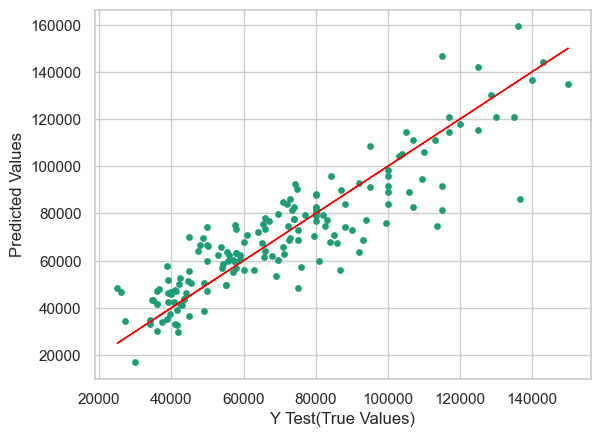

In [40]:
plt.scatter(y_test,predictions,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)

plt.show()

## Evaluating the Model

In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9554.307860113866
MSE: 159783322.29053506
RMSE: 12640.542800470836


In [42]:
print('Variance:', metrics.explained_variance_score(y_test, predictions))

Variance: 0.8008564888151078


Variance (or R-squared) evaluates the scatter of the data points around the fitted regression line. Higher R-squared values represent smaller differences between the observed data and the fitted values.

R-squared is always between 0 and 100%:
- 100% represents a model that explains all the variation in the response variable around its mean. 

We have 80%, which means that our model explains around 80% of observations.

## Residuals

Now, let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

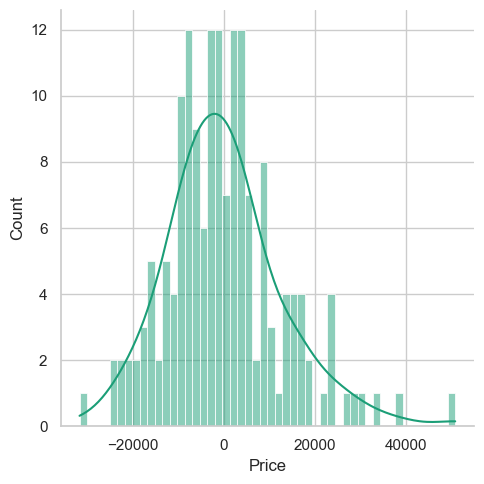

In [44]:
sns.displot((y_test-predictions),kde=True, bins=50);

## Thank you!